In [1]:
import numpy as np
import vaex as vx
import pylab
#ds = vx.open("/home/data/gavi/Aq-A-2-999-shuffled-10percent.hdf5")
server = vx.server("localhost")
ds = server.open("Aq-A-2-999-shuffled-10percent")
%matplotlib inline

fetching http://localhost:5000/columns/Aq-A-2-999-shuffled-10percent
columns [u'x', u'y', u'z', u'vx', u'vy', u'vz', u'ID', u'random_index']


/Users/users/breddels/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Simplest example
=========
The default for plot is to calculate the mean +/- 3 sigma for the limits, and plot the density plot

fetching http://localhost:5000/histogram/Aq-A-2-999-shuffled-10percent
data (256, 256) [[  1.   2.   9. ...,   2.   3.   8.]
 [  3.   8.  19. ...,   5.   5.   0.]
 [  7.  22.   3. ...,   3.   3.   3.]
 ..., 
 [  1.   0.   0. ...,   1.   0.   1.]
 [  0.   0.   0. ...,   0.   0.   1.]
 [  0.   0.   0. ...,   0.   0.   1.]]


/Users/users/breddels/gavi/src/SubspaceFinding/python/vaex/dataset.py:358: RuntimeWarning: divide by zero encountered in log
  pylab.imshow(f(grid), extent=np.array(limits).flatten(), origin="lower", **kwargs)


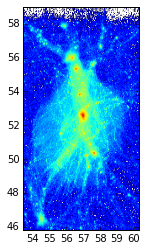

In [2]:
expr = ds("x", "y")
expr.plot(f=np.log)

More control
============
For more control, you can find the limits yourself, with minmax or limits_sigma, do the histogram, and let vaex handle the plotting.

Vaex uses matplotlib, so any matplotlib routines before and afterwards are fine.

In [3]:
limits = expr.limits_sigma(square=True, sigmas=0.4)
means = expr.mean()
print "limits", limits

limits [[ 56.19915172  57.53372811]
 [ 51.75140837  53.08598476]]


In [4]:
grid = expr.histogram(size=256, limits=limits)

fetching http://localhost:5000/histogram/Aq-A-2-999-shuffled-10percent
data (256, 256) [[ 0.  0.  1. ...,  1.  3.  0.]
 [ 1.  3.  0. ...,  1.  2.  0.]
 [ 2.  0.  1. ...,  5.  1.  2.]
 ..., 
 [ 3.  1.  1. ...,  7.  4.  5.]
 [ 0.  0.  1. ...,  3.  4.  7.]
 [ 2.  0.  3. ...,  9.  8.  4.]]


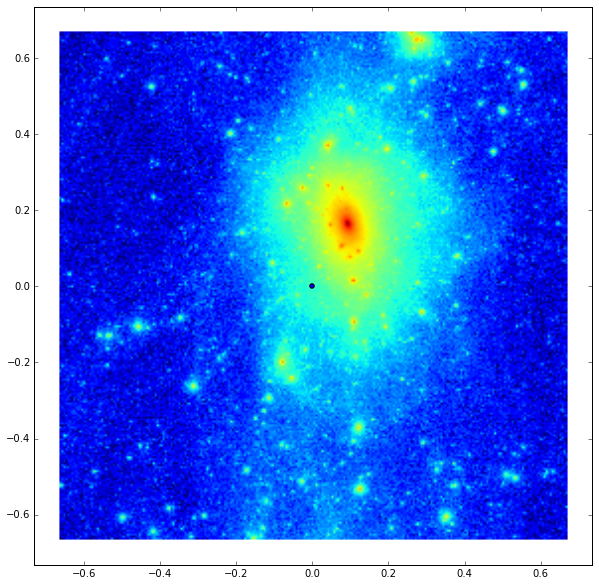

In [5]:
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
expr.plot(np.log10(grid+1), limits, center=means)
pylab.scatter(0, 0)

More control
======
Extra keywords will be passed to pylab.imshow, such as cmap for the colormap

fetching http://localhost:5000/histogram/Aq-A-2-999-shuffled-10percent
data (512, 512) [[ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  2.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


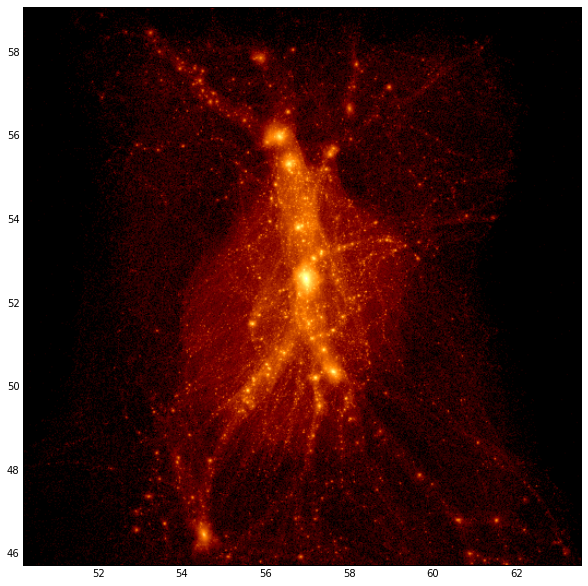

In [6]:
limits = expr.limits_sigma(sigmas=4, square=True)
grid = expr.histogram(size=512, limits=limits)
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
expr.plot(grid, limits=limits, f=np.log1p, cmap='afmhot')

In [7]:
#reload_ext autoreload
%load_ext autoreload
%autoreload 2


Selections
==========
Selections can be done using expressions as well. To use the selection, use expr.masked()

In [7]:
ds.select("(z<48)")
masked = expr.selected()
grid_masked1 = masked.histogram(size=512, limits=limits)
ds.select("(z>50)")
grid_masked2 = masked.histogram(size=512, limits=limits)


fetching http://localhost:5000/histogram/Aq-A-2-999-shuffled-10percent
data (512, 512) [[ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
fetching http://localhost:5000/histogram/Aq-A-2-999-shuffled-10percent
data (512, 512) [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


/net/jansky/data/users/breddels/local-home/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/net/jansky/data/users/breddels/local-home/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


<matplotlib.contour.QuadContourSet instance at 0x2abc4499d638>

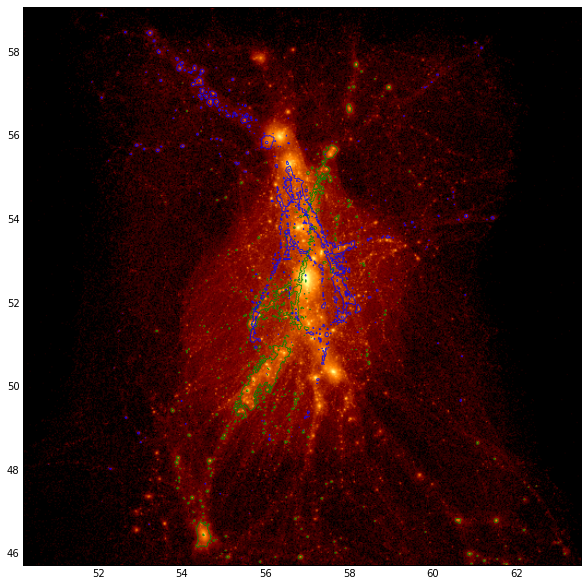

In [9]:
cmap = 'afmhot'
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
expr.plot(np.log(grid+1), limits=limits, cmap=cmap, alpha=1.0)
#expr.plot(np.log(grid_masked), limits=limits, cmap=cmap, alpha=0.5)
pylab.contour(np.log(grid_masked1), 2, extent=np.array(limits).flatten(), alpha=0.8, colors="green")
pylab.contour(np.log(grid_masked2), 2, linewidth="2pt", colors="blue", extent=np.array(limits).flatten(), alpha=0.8)

In [6]:
%aimport vaex
%aimport vaex.dataset


ERROR: Line magic function `%aimport` not found.
ERROR: Line magic function `%aimport` not found.


In [10]:
expr = ds("x", "y")

In [12]:
expr.mean()

array([ 56.86666655,  52.41889244])